In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [2]:
matrix = [[0, 0, -1, 0],
          [1, 0, 0, -1],
          [0, 1, 0, 0], 
          [0, 0, 1, 0]]

In [4]:
tabela_prob = pd.read_csv('tab_prob.csv')
df1 = pd.DataFrame(tabela_prob)
df1 = df1.replace(np.nan, '', regex=True)
df1

gene x1 x2 x3 x4  p=0  p=1
0    x1  0     0       1    0
1    x1  0     1       1    0
2    x1  1     0       0    1
3    x1  1     1       1    0
4    x2  0  0     0    1    0
5    x2  0  0     1    1    0
6    x2  0  1     0    0    1
7    x2  0  1     1    1    0
8    x2  1  0     0    0    1
9    x2  1  0     1    1    0
10   x2  1  1     0    0    1
11   x2  1  1     1    0    1
12   x3     0  0       1    0
13   x3     0  1       0    1
14   x3     1  0       0    1
15   x3     1  1       0    1
16   x4        0  0    1    0
17   x4        0  1    0    1
18   x4        1  0    0    1
19   x4        1  1    0    1

In [5]:
def prox_est(inter_matrix,lista):    
    x = np.array([lista])
    y = np.matmul(x,inter_matrix)
    z = []
    for i in range(0, len(y[0])):
        if y[0][i] > 0:
            z.append(1)
        if y[0][i] < 0:
            z.append(0)
        if y[0][i] == 0:
            z.append(x[0][i])
        

    return z

In [6]:
def listas(n):
    listas = []
    for i in range(n):
        listas.append(list(bin(i)[2:]))
    for i in listas:
        while len(i) < 4:
            i.insert(0,'0')
    return listas  

todos = []
for i in listas(16):
    i = [int(x) for x in i]
    todos.append(i)

print(todos)

[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]


In [7]:
trns = []
saidas = []
chegadas = []
for i in todos:
    x = ''.join(str(e) for e in i)
    y = ''.join(str(e) for e in prox_est(np.array(matrix).T,i))
    trns.append((x,y))
    saidas.append(x)
    chegadas.append(y)
    print(x, ":", y)


0000 : 0000
0001 : 0001
0010 : 0011
0011 : 0011
0100 : 0110
0101 : 0011
0110 : 0111
0111 : 0011
1000 : 1100
1001 : 1001
1010 : 0111
1011 : 0011
1100 : 1110
1101 : 1111
1110 : 0111
1111 : 0111


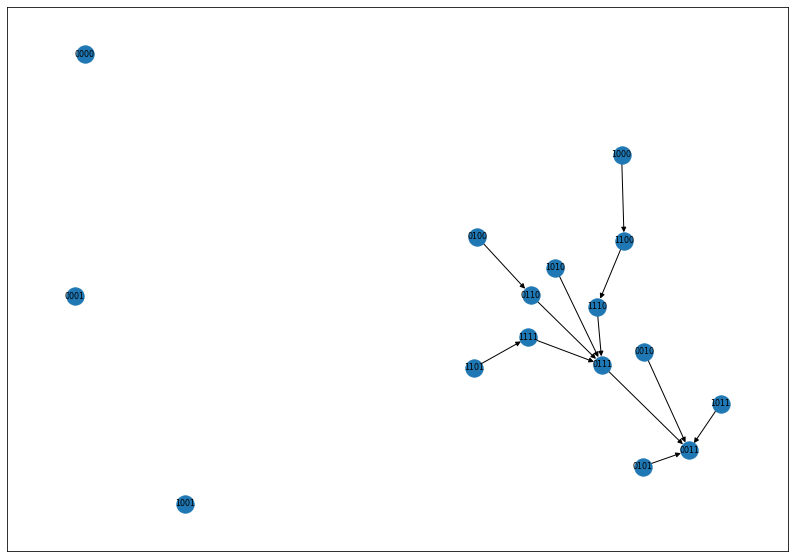

In [8]:
G = nx.DiGraph()
G.add_edges_from(trns)
pos = nx.spring_layout(G)
plt.figure(3,figsize=(14,10)) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

In [9]:
vals = []
for i in chegadas:
    vals.append(saidas.index(i))  
mtx_trn = []
for i in range(0,16):
    linha = []
    for j in range(0,16):
        if i == vals[j]:
            linha.append(1)
        else:
            linha.append(0)
    mtx_trn.append(linha)
df_matrix = pd.DataFrame(np.array(mtx_trn), columns = [x[0] for x in trns], index = [x[0] for x in trns])
df_matrix

0000  0001  0010  0011  0100  0101  0110  0111  1000  1001  1010  1011  \
0000     1     0     0     0     0     0     0     0     0     0     0     0   
0001     0     1     0     0     0     0     0     0     0     0     0     0   
0010     0     0     0     0     0     0     0     0     0     0     0     0   
0011     0     0     1     1     0     1     0     1     0     0     0     1   
0100     0     0     0     0     0     0     0     0     0     0     0     0   
0101     0     0     0     0     0     0     0     0     0     0     0     0   
0110     0     0     0     0     1     0     0     0     0     0     0     0   
0111     0     0     0     0     0     0     1     0     0     0     1     0   
1000     0     0     0     0     0     0     0     0     0     0     0     0   
1001     0     0     0     0     0     0     0     0     0     1     0     0   
1010     0     0     0     0     0     0     0     0     0     0     0     0   
1011     0     0     0     0     0     0     0     0     0     0     0     0   
1100     0     0     0     0     0     0     0     0     1     0     0     0   
1101     0     0     0     0     0     0     0     0     0     0     0     0   
1110     0     0     0     0     0     0     0     0     0     0     0     0   
1111     0     0     0     0     0     0     0     0     0     0     0     0   

      1100  1101  1110  1111  
0000     0     0     0     0  
0001     0     0     0     0  
0010     0     0     0     0  
0011     0     0     0     0  
0100     0     0     0     0  
0101     0     0     0     0  
0110     0     0     0     0  
0111     0     0     1     1  
1000     0     0     0     0  
1001     0     0     0     0  
1010     0     0     0     0  
1011     0     0     0     0  
1100     0     0     0     0  
1101     0     0     0     0  
1110     1     0     0     0  
1111     0     1     0     0